# Support vector machine

## Linear kernel binary classifier (Pegasos)

In [34]:
import numpy as np
import math

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import svm

### Linearly separable 2d-input

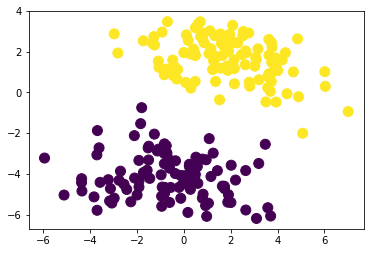

In [35]:
size = 100
# blob 1
x = np.random.normal(2,2,(size))
y = np.random.normal(2,1,(size))-x/4
# blob 2
x = np.concatenate((x,np.random.normal(-1,2,(size))))
y = np.concatenate((y,np.random.normal(-4,1,(size))))

# add xy together, add intercept 
X = np.hstack((np.ones(2*size),x,y)).reshape(3,2*size).T
# reuse y for flags
y[:size] = 1
y[size:] = -1

plt.scatter(X[:,1],X[:,2],c=y,s=100)
plt.show()

### Support vector classifier

Currently only works with linear kernel (i.e. no kernel) and with binary classification

In [36]:
classifier = svm.SVM()

In [37]:
classifier.fit(X,y)

**Scoring on training set is easy**

In [38]:
classifier.score(X,y)

0.995

**Boundary condition**

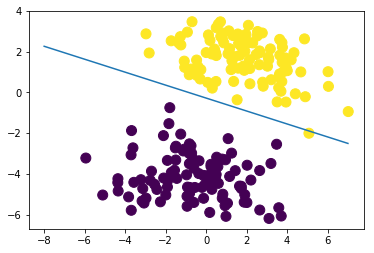

In [40]:
w = classifier.weights
xx = np.arange(-8,8,1)
yy=(-w[0]-w[1]*xx)/w[2]
plt.scatter(X[:,1],X[:,2],c=y,s=100)
plt.plot(xx,yy)
plt.show()

In [41]:
size = 100
# blob 1
t_x = np.random.normal(2,2,(size))
t_y = np.random.normal(2,1,(size))-t_x/4
# blob 2
t_x = np.concatenate((t_x,np.random.normal(-1,2,(size))))
t_y = np.concatenate((t_y,np.random.normal(-4,1,(size))))

# add xy together, add intercept 
t_X = np.hstack((np.ones(2*size),t_x,t_y)).reshape(3,2*size).T
# reuse y for flags
t_y[:size] = 1
t_y[size:] = -1

classifier.score(t_X,t_y)

0.99

**Note: scoring on test set will usually be inferior to the training set**

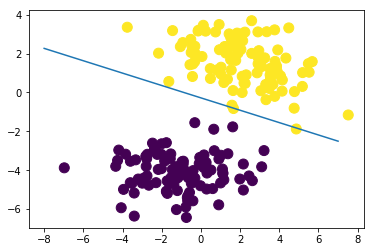

In [42]:
plt.scatter(t_X[:,1],t_X[:,2],c=t_y,s=100)
plt.plot(xx,yy)
plt.show()

### 3D demonstration

In [43]:
# 3d

In [52]:
# no intercept, gives more balanced input
coefficients = [0]
for i in range(1,4):
    coefficients.append((np.random.rand()-0.5)*5)
x2 = np.ones((size,len(coefficients)))
for i in range(1,len(coefficients)):
    x2[:,i]=np.random.rand(size)
y2 = np.vectorize(lambda x: round(1/(1+math.exp(-x))))((x2*coefficients).sum(axis=1) + np.random.normal(size=size))

tx2 = np.ones((size,len(coefficients)))
for i in range(1,len(coefficients)):
    tx2[:,i]=np.random.rand(size)
ty2 = np.vectorize(lambda x: round(1/(1+math.exp(-x))))((tx2*coefficients).sum(axis=1) + np.random.normal(size=size))

np.round(coefficients,3)

array([ 0.   , -2.185,  0.019,  2.39 ])

Coefficients above (logistic function)

Make sure data is more or less balanced:

In [53]:
print((y2==1).sum())
print((ty2==1).sum())

53
44


**Fit on training set, and test on test set**

In [54]:
classifier.fit(x2,y2,epochs=2000)
w = classifier.weights
classifier.score(tx2,ty2)

0.76

**3D plot**

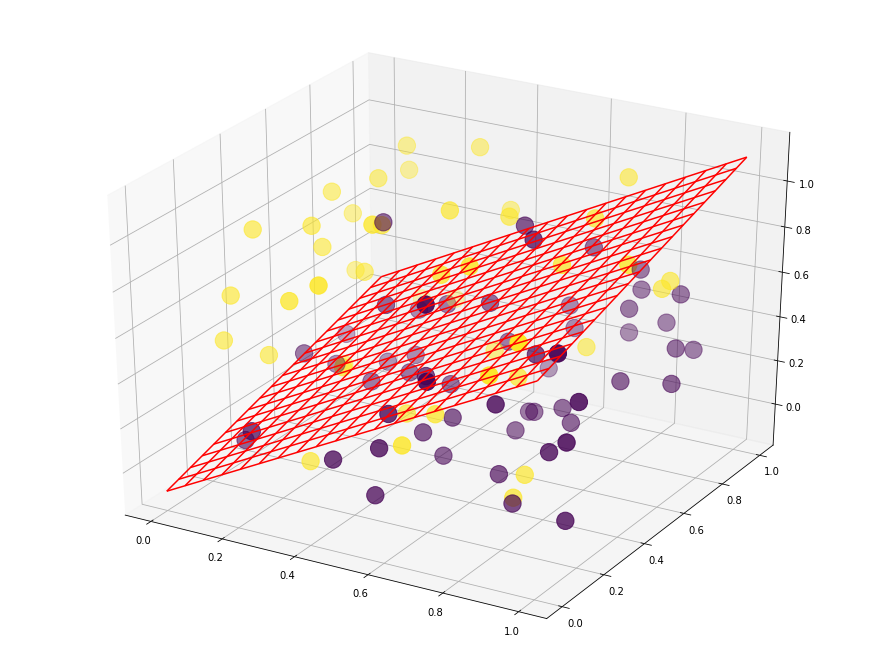

In [55]:
fig = plt.figure(figsize=(12,9))
ax = Axes3D(fig)

ax.scatter(tx2[:,1], tx2[:,2], tx2[:,3],c=ty2,s=300)

b_x = np.linspace(0,1,20)
b_y = np.linspace(0,1,20)
b_x, b_y = np.meshgrid(b_x,b_y)
b_z = (-w[0]-w[1]*b_x-w[2]*b_y)/w[3]
ax.plot_wireframe(b_x,b_y,b_z,color='red')

#ax.view_init(10, 0)

plt.show()

**It is not really apparent that this boundary (in 3D a flat surface) does a good job. <br>
Let's rotate the view**

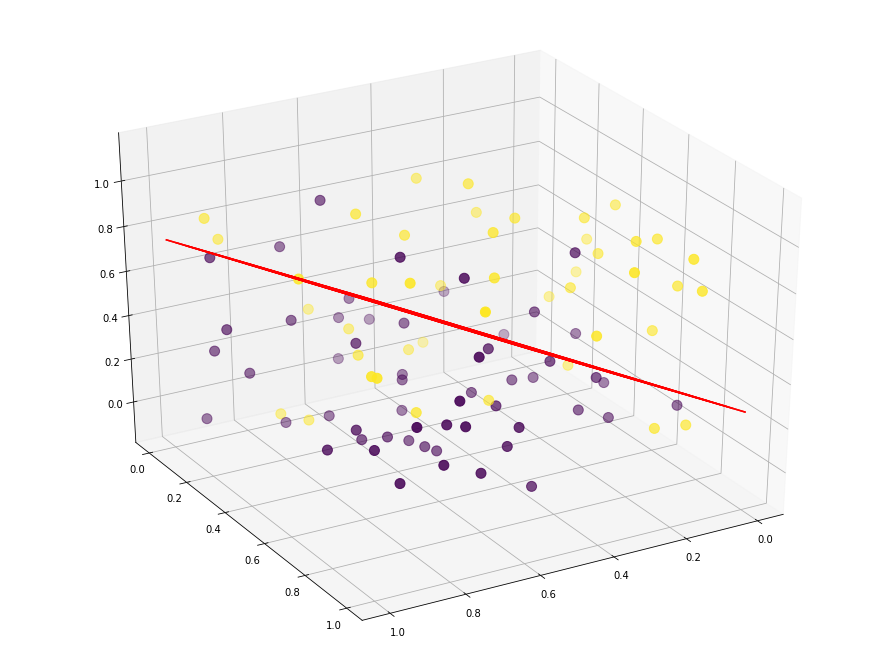

In [72]:
fig = plt.figure(figsize=(12,9))
ax = Axes3D(fig)

ax.scatter(tx2[:,1], tx2[:,2], tx2[:,3],c=ty2,s=100)

b_x = np.linspace(0,1,20)
b_y = np.linspace(0,1,20)
b_x, b_y = np.meshgrid(b_x,b_y)
b_z = (-w[0]-w[1]*b_x-w[2]*b_y)/w[3]
ax.plot_wireframe(b_x,b_y,b_z,color='red')

ax.view_init(elev=31,azim=60)

plt.show()

**Fairly good separation**

### n-dimentions

Example using 20 dimensions

In [85]:
# no intercept, gives more balanced input
coefficients = [0]
for i in range(1,20):
    coefficients.append((np.random.rand()-0.5)*5)
x3 = np.ones((size,len(coefficients)))
for i in range(1,len(coefficients)):
    x3[:,i]=np.random.rand(size)
y3 = np.vectorize(lambda x: round(1/(1+math.exp(-x))))((x3*coefficients).sum(axis=1) + np.random.normal(size=size))

tx3 = np.ones((size,len(coefficients)))
for i in range(1,len(coefficients)):
    tx3[:,i]=np.random.rand(size)
ty3 = np.vectorize(lambda x: round(1/(1+math.exp(-x))))((tx3*coefficients).sum(axis=1) + np.random.normal(size=size))

np.round(coefficients,3)

array([ 0.   ,  0.169,  1.073,  2.316, -2.38 ,  0.474, -1.776, -1.972,
       -1.78 ,  2.077,  0.852,  0.4  , -0.369, -2.344,  1.968,  1.522,
       -1.299,  2.094,  0.926, -2.061])

Check balance

In [86]:
print((y3==1).sum())
print((ty3==1).sum())

48
52


**Fit data and score training set**

In [87]:
classifier.fit(x3,y3)
classifier.score(x3,y3)

0.83

**Score test set**

In [88]:
classifier.score(tx3,ty3)

0.79

## Input parameters

Learning rate, number of epochs and the regularization parameter C can all be specified by the user:

In [89]:
classifier.fit(x3,y3,learning_rate=5)
classifier.score(tx3,ty3)

0.55

In [90]:
classifier.fit(x3,y3,learning_rate=0.1)
classifier.score(tx3,ty3)

0.84

**Note: learning rate for regularization decays as 1/epoch, so too many epochs tend to result in poor predictions**

In [91]:
classifier.fit(x3,y3,epochs=3000)
classifier.score(tx3,ty3)

0.79

In [92]:
classifier.fit(x3,y3,epochs=100)
classifier.score(tx3,ty3)

0.77

In [93]:
classifier.fit(x3,y3,C=0.1)
classifier.score(tx3,ty3)

0.76

In [94]:
classifier.fit(x3,y3,C=5)
classifier.score(tx3,ty3)

0.78

**Note: estimator automatically adds the constant x0 column of 1's**
Column is also automatically added in `predict` and `score`

In [99]:
classifier.fit(x3[:,1:],y3)
classifier.score(tx3,ty3)

0.84

In [100]:
classifier.score(tx3[:,1:],ty3)

0.84

In [101]:
classifier.predict(tx3[:,1:])

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0])

<br><br>
User can force estimator not to add, however this can result in poor predictions

In [103]:
classifier.fit(x3[:,1:],y3,add_x0=False)
classifier.score(tx3[:,1:],ty3)

0.52

**Labels do not have to be -1 and 1**
<br>
The estimator will internally convert them to -1 and 1
<br>
Note: the above exmaple uses `[0,1]` but any label will work?

In [104]:
y3=y3.astype(str)
y3[y3=='0'] = 'labelA'
y3[y3=='1'] = 'else'

In [105]:
classifier.fit(x3,y3)

Look at internal labels (first is treated as `-1` and second is treated as `1`

In [106]:
classifier.labels

array(['else', 'labelA'], dtype='<U21')

In [107]:
classifier.predict(tx3)

array(['labelA', 'else', 'labelA', 'labelA', 'labelA', 'labelA', 'labelA',
       'labelA', 'labelA', 'labelA', 'labelA', 'labelA', 'labelA', 'else',
       'labelA', 'labelA', 'labelA', 'labelA', 'labelA', 'labelA',
       'labelA', 'labelA', 'labelA', 'labelA', 'labelA', 'else', 'labelA',
       'labelA', 'labelA', 'else', 'labelA', 'labelA', 'labelA', 'labelA',
       'labelA', 'labelA', 'labelA', 'labelA', 'labelA', 'else', 'labelA',
       'else', 'labelA', 'labelA', 'labelA', 'labelA', 'labelA', 'labelA',
       'labelA', 'labelA', 'labelA', 'else', 'else', 'labelA', 'labelA',
       'labelA', 'labelA', 'labelA', 'labelA', 'labelA', 'labelA', 'else',
       'labelA', 'labelA', 'else', 'else', 'labelA', 'labelA', 'labelA',
       'labelA', 'labelA', 'labelA', 'labelA', 'else', 'labelA', 'labelA',
       'labelA', 'labelA', 'else', 'labelA', 'labelA', 'labelA', 'labelA',
       'labelA', 'labelA', 'labelA', 'labelA', 'labelA', 'labelA',
       'labelA', 'labelA', 'labelA', 'labelA'

**User can observe weights to construct the hyper-plane**

In [108]:
classifier.weights

array([-3.90847623,  0.47516677, -0.42503254, -8.32353846,  9.27985428,
        0.33541659,  3.93222975,  6.73206478,  4.77399728, -3.64547973,
       -1.28890472, -2.66523929,  5.64890594,  5.84973714, -4.21352735,
       -0.63543035,  5.70578534, -1.7096877 , -4.81312135,  5.01273196])